In [152]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from pygsp import graphs, filters
%matplotlib inline

In [91]:
data= pd.read_csv('jams.tsv',error_bad_lines=False,sep='\t',encoding='utf-8')

b'Skipping line 7872: expected 7 fields, saw 8\nSkipping line 11730: expected 7 fields, saw 9\nSkipping line 14131: expected 7 fields, saw 8\nSkipping line 58054: expected 7 fields, saw 8\nSkipping line 58754: expected 7 fields, saw 8\n'
b'Skipping line 847129: expected 7 fields, saw 8\n'
b'Skipping line 1091153: expected 7 fields, saw 8\nSkipping line 1175375: expected 7 fields, saw 8\n'
b'Skipping line 1225935: expected 7 fields, saw 8\nSkipping line 1255357: expected 7 fields, saw 8\nSkipping line 1279671: expected 7 fields, saw 8\n'
b'Skipping line 1330675: expected 7 fields, saw 8\n'
b'Skipping line 1448033: expected 7 fields, saw 8\nSkipping line 1543893: expected 7 fields, saw 8\n'
b'Skipping line 1579569: expected 7 fields, saw 8\nSkipping line 1612448: expected 7 fields, saw 8\n'
b'Skipping line 1784588: expected 7 fields, saw 8\n'


In [6]:
data.head(5)

,jam_id,user_id,artist,title,creation_date,link,spotify_uri
0,c2e76bb92c7fa733fdfc9be40bb0e4ea,b99ebf68a8d93f024e56c65e2f949b57,Orange Juice,Rip It Up,2011-08-26,NaN,spotify:track:6AGhDIyDbRonzGTdbIsNXa
1,5d2bc46196d7903a5580f0dbedc09610,c1066039fa61eede113878259c1222d1,Erkin Koray,Hele Yar,2011-08-26,NaN,NaN
2,4849f8c893a792032dbc15eb77cfd0cd,d8a96caeef5c7d8dbdc9cec28aa9c044,Stereo,Somewhere In the Night,2011-08-26,NaN,spotify:track:2ZM9sVP0blBj1lNIEg4dgn
3,8940ff2e8e38c8f1a4676e09d152c0cd,b1c81a51f5286d70e5820ecb85aeba96,The Mills Brothers,I Got Her Off My Hands,2011-08-26,NaN,spotify:track:096elxAmYuyAFJKPLrS5oY
4,4020b45a4c6d5515a3b62c489e169828,4fdc0257bc476bffd3e73564ecaa75e0,Various,Zum Volksfest,2011-08-26,NaN,NaN


In [3]:
net = pd.read_csv('followers.tsv',error_bad_lines=False,sep='\t',encoding='utf-8')

In [6]:
net.head(5)

,followed_user_id,follower_user_id
0,b99ebf68a8d93f024e56c65e2f949b57,1ebda3c5e05265626ab18401fb33a90a
1,c1066039fa61eede113878259c1222d1,1ebda3c5e05265626ab18401fb33a90a
2,d8a96caeef5c7d8dbdc9cec28aa9c044,1ebda3c5e05265626ab18401fb33a90a
3,2969c319775d884b860a897ba9d6156f,1ebda3c5e05265626ab18401fb33a90a
4,ff58e67948917e0ff71ba4b33e158365,1ebda3c5e05265626ab18401fb33a90a


In [7]:
followed=list(net['followed_user_id'].unique())

In [8]:
followers=list(net['follower_user_id'].unique())

In [9]:
nodes=list(set(followed+followers))

In [112]:
G=nx.Graph()
G.add_nodes_from(nodes)

In [116]:
for i in tqdm(range(len(net))):
    G.add_edge(net['followed_user_id'].iloc[i],net['follower_user_id'].iloc[i],weight=1)

100%|█████████████████████████████████████████████████████████████████████| 1603404/1603404 [02:25<00:00, 11003.97it/s]


In [15]:
degrees = np.array(list(dict(nx.degree(G)).values()))

(array([  1.01250000e+05,   1.70000000e+01,   3.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   5.31200000e+03,   1.06230000e+04,
          1.59340000e+04,   2.12450000e+04,   2.65560000e+04,
          3.18670000e+04,   3.71780000e+04,   4.24890000e+04,
          4.78000000e+04,   5.31110000e+04]),
 <a list of 10 Patch objects>)

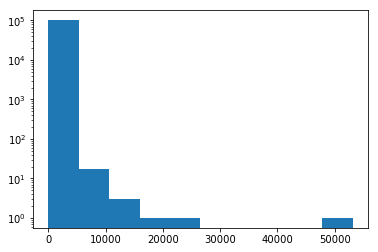

In [16]:
plt.hist(degrees, log=True)

In [17]:
small_degrees = degrees[degrees < 50]
plt.hist(small_degrees)

In [19]:
nx.is_connected(G)

False

In [22]:
#Here we will keep the greatest component Gcc[0] for the further analysis
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)

In [59]:
len(Gcc[0])

100518

In [27]:
 A = nx.adjacency_matrix(Gcc[0])

In [32]:
A

<100518x100518 sparse matrix of type '<class 'numpy.int32'>'
	with 2588324 stored elements in Compressed Sparse Row format>

In [38]:
A.setdiag(0)

C:\Users\User\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [39]:
G = graphs.Graph(A)

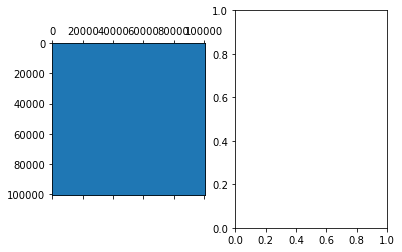

In [47]:
G.compute_laplacian('normalized')

fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=0.6)
axes[1].hist(G.L.data, bins=50, log=True);

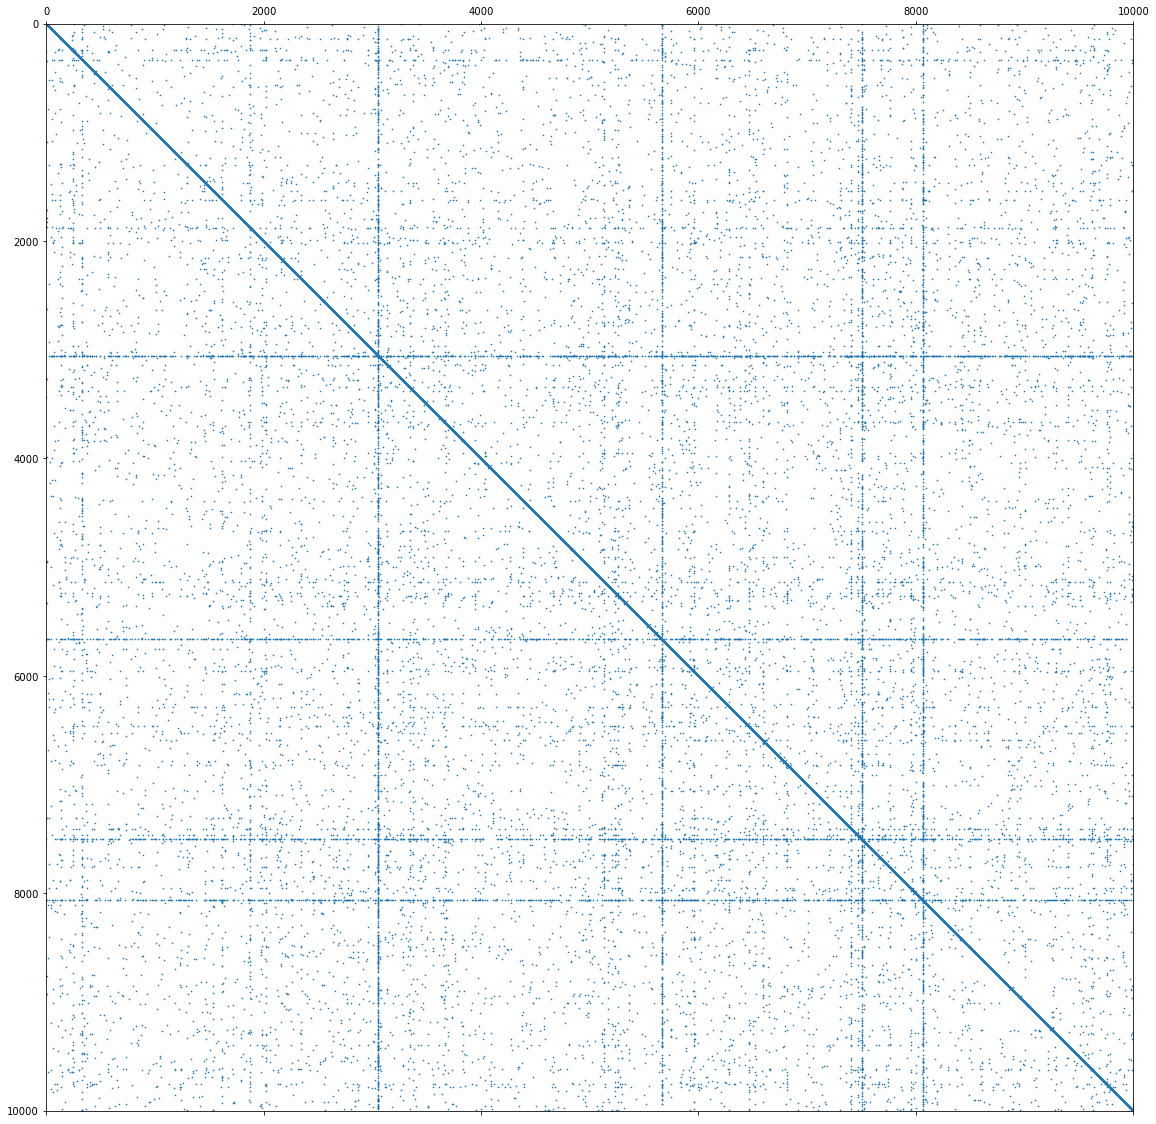

In [84]:
plt.figure(figsize=(10,10))
plt.spy(G.L[0:10000,  0:10000],markersize=0.6)

In [86]:
likes = pd.read_csv('likes.tsv',error_bad_lines=False,sep='\t',encoding='utf-8')

In [88]:
likes.head()

,user_id,jam_id
0,c1066039fa61eede113878259c1222d1,5d2bc46196d7903a5580f0dbedc09610
1,b99ebf68a8d93f024e56c65e2f949b57,8940ff2e8e38c8f1a4676e09d152c0cd
2,c1066039fa61eede113878259c1222d1,4849f8c893a792032dbc15eb77cfd0cd
3,c1066039fa61eede113878259c1222d1,4020b45a4c6d5515a3b62c489e169828
4,b99ebf68a8d93f024e56c65e2f949b57,4849f8c893a792032dbc15eb77cfd0cd


In [92]:
data.head()

,jam_id,user_id,artist,title,creation_date,link,spotify_uri
0,c2e76bb92c7fa733fdfc9be40bb0e4ea,b99ebf68a8d93f024e56c65e2f949b57,Orange Juice,Rip It Up,2011-08-26,NaN,spotify:track:6AGhDIyDbRonzGTdbIsNXa
1,5d2bc46196d7903a5580f0dbedc09610,c1066039fa61eede113878259c1222d1,Erkin Koray,Hele Yar,2011-08-26,NaN,NaN
2,4849f8c893a792032dbc15eb77cfd0cd,d8a96caeef5c7d8dbdc9cec28aa9c044,Stereo,Somewhere In the Night,2011-08-26,NaN,spotify:track:2ZM9sVP0blBj1lNIEg4dgn
3,8940ff2e8e38c8f1a4676e09d152c0cd,b1c81a51f5286d70e5820ecb85aeba96,The Mills Brothers,I Got Her Off My Hands,2011-08-26,NaN,spotify:track:096elxAmYuyAFJKPLrS5oY
4,4020b45a4c6d5515a3b62c489e169828,4fdc0257bc476bffd3e73564ecaa75e0,Various,Zum Volksfest,2011-08-26,NaN,NaN


In [94]:
merge = likes.merge(data[['jam_id','user_id']],on='jam_id')

In [95]:
merge.head()

,user_id_x,jam_id,user_id_y
0,c1066039fa61eede113878259c1222d1,5d2bc46196d7903a5580f0dbedc09610,c1066039fa61eede113878259c1222d1
1,b99ebf68a8d93f024e56c65e2f949b57,8940ff2e8e38c8f1a4676e09d152c0cd,b1c81a51f5286d70e5820ecb85aeba96
2,c1066039fa61eede113878259c1222d1,8940ff2e8e38c8f1a4676e09d152c0cd,b1c81a51f5286d70e5820ecb85aeba96
3,2969c319775d884b860a897ba9d6156f,8940ff2e8e38c8f1a4676e09d152c0cd,b1c81a51f5286d70e5820ecb85aeba96
4,c1066039fa61eede113878259c1222d1,4849f8c893a792032dbc15eb77cfd0cd,d8a96caeef5c7d8dbdc9cec28aa9c044


In [101]:
groups = merge.groupby(['user_id_x','user_id_y']).count()

In [151]:
groups.sort_values(by='jam_id',ascending=False).head()

,,jam_id
user_id_x,user_id_y,
8e01cba1a99a9eae7ffbb7bb76aac150,fd3292545fd8b2c8dcbdb86335052238,1723
a12e5a826d390a0a138c21841b8f34c7,fd3292545fd8b2c8dcbdb86335052238,1619
8eaf92d9023c44e657193e50f09e7725,fd3292545fd8b2c8dcbdb86335052238,1404
126932e6915c39fd6127c0c635461307,126932e6915c39fd6127c0c635461307,1307
dc87e7ab06a5aad596130c6966d2fe0c,fd3292545fd8b2c8dcbdb86335052238,1163


In [150]:
groups.head()

jam_id
user_id_x                        user_id_y                               
00044a47bc152c66971012efdbe43ceb 3aa1236e04aa93270877b8da29e9f21a       1
                                 81466516200938426da0d340d7c8d7ef       1
                                 9724f3c1040bb724bdf86fe05cc54dfc       1
0004e823b6a1779416ef15d70c3cfdaa 56a26dda764fc9a1267f6308e496c976       1
                                 dcd8823b8dad1321a6bc814fc5fa7681       1

In [140]:
users = list(set(merge['user_id_x']).union(set(merge['user_id_y'])))

In [147]:
u = set.intersection(set(users), set(nodes))

In [149]:
for i in tqdm(range(len(groups))):
    if (groups.iloc[i].name[0] in u and groups.iloc[i].name[1] in u):
        if groups.iloc[i].name[1] in G.neighbors(groups.iloc[i].name[0]):
            G[groups.iloc[i].name[0]][groups.iloc[i].name[1]]['weight'] += groups.iloc[i]['jam_id']

100%|███████████████████████████████████████████████████████████████████████| 1384551/1384551 [27:50<00:00, 828.64it/s]
